In [19]:
import numpy as np
from scipy import stats

def calculate_distance_between_lines(points1, points2):
    # 将点集分别拆分成x和y坐标
    x1, y1 = zip(*points1)
    x2, y2 = zip(*points2)

    # 执行最小二乘线性回归，使用第一组点
    slope1, intercept1, _, _, _ = stats.linregress(x1, y1)

    # 计算第一组点回归线的方程：y = mx + b
    def regression_line1(x):
        return slope1 * x + intercept1

    # 执行最小二乘线性回归，使用第二组点
    slope2, intercept2, _, _, _ = stats.linregress(x2, y2)

    # 计算第二组点回归线的方程：y = mx + b
    def regression_line2(x):
        return slope2 * x + intercept2

    # 计算每个第二组点到第二组点回归线的法向量投影点
    projection_points2 = []
    for x, y in zip(x2, y2):
        x_proj2 = (x + slope2 * y - slope2 * intercept2) / (1 + slope2**2)
        y_proj2 = slope2 * x_proj2 + intercept2
        projection_points2.append((x_proj2, y_proj2))

    # 计算每个第二组点回归线的法向量投影点到第一组点回归线的投影点
    projection_points1 = []
    for x_proj2, y_proj2 in projection_points2:
        x_proj1 = (x_proj2 + slope1 * y_proj2 - slope1 * intercept1) / (1 + slope1**2)
        y_proj1 = slope1 * x_proj1 + intercept1
        projection_points1.append((x_proj1, y_proj1))

    # 计算每个第一组点到投影点的距离
    distances = [np.linalg.norm(np.array([x, y]) - np.array([x_proj1, y_proj1])) for (x, y), (x_proj1, y_proj1) in zip(projection_points2, projection_points1)]

    return np.array(distances)

# 例子
points1 = [(1, 1), (2,2)]
points2 = [(1, 2),(1.5,2.5), (0.5,1.5)]

normal_distances = calculate_distance_between_lines(points1, points2) * 0.5
print("法向量距离:", normal_distances)


points1 = np.array(points1)
points2 = np.array(points2)

points1 = points1[:,::-1]
points2 = points2[:,::-1]
# print(points1)

average_dist = calculate_distance_between_lines(points1, points2)
print("平均距离:", average_dist)


法向量距离: [0.35355339 0.35355339 0.35355339]
平均距离: [0.70710678 0.70710678 0.70710678]


In [12]:
def find_left_right_coordinates(vector):
    indices = np.where(vector >= 1)[0]
    if len(indices) == 0:
        return None, None
    left_coordinate = indices[0]
    right_coordinate = indices[-1]
    return left_coordinate, right_coordinate

# 示例一维向量（只包含 0 和 1）
vector = np.array([0, 0, 1, 0, 1, 1, 0, 2, 1, 0])

# 示例一维向量（只包含 0 和 1）
# vector = [0, 0, 1, 0, 1, 1, 0, 1, 0, 0,1]

# 获取不为零的最左边坐标和最右边坐标
left_coordinate, right_coordinate = find_left_right_coordinates(vector)

print("最左边坐标:", left_coordinate)
print("最右边坐标:", right_coordinate)


最左边坐标: 2
最右边坐标: 8


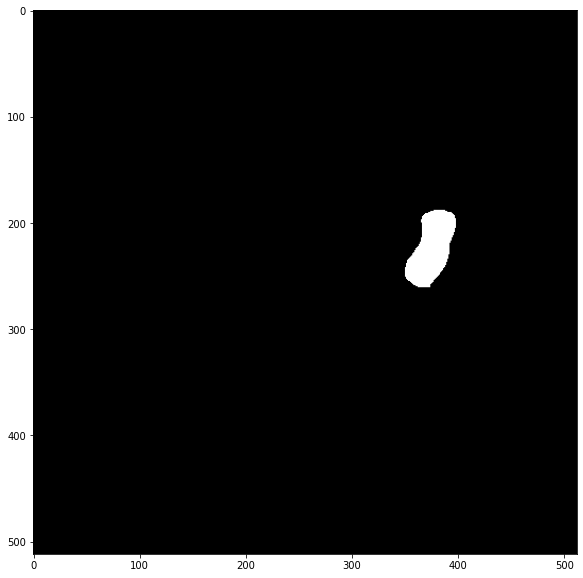

In [11]:
import matplotlib.pylab as plt
import os
# from PIL import Image
import numpy as np
name = "10033831_06.npy"
dirpath = "/home1/zhhli/sagmask/"
img_name = os.path.join(dirpath.replace("sagjpg", "sagmask"), name)
# img = Image.open(img_name).convert("L")
img = np.load(img_name)

toshow = np.int32(img==2) + np.int32(img==1)
plt.figure(figsize=(10,10))
plt.imshow(toshow, cmap='gray')